In [3]:
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
avocados = pd.read_pickle('avoplotto.pkl')

In [7]:
avocados.head()

,date,type,year,avg_price,size,nb_sold
0,2015-12-27,conventional,2015,0.95,small,9626901.09
1,2015-12-20,conventional,2015,0.98,small,8710021.76
2,2015-12-13,conventional,2015,0.93,small,9855053.66
3,2015-12-06,conventional,2015,0.89,small,9405464.36
4,2015-11-29,conventional,2015,0.99,small,8094803.56


#**Which avocado size is most popular?**
Avocados are increasingly popular and delicious in guacamole and on toast. The Hass Avocado Board keeps track of avocado supply and demand across the USA, including the sales of three different sizes of avocado. In this exercise, you'll use a bar plot to figure out which size is the most popular.

Bar plots are great for revealing relationships between categorical (size) and numeric (number sold) variables, but you'll often have to manipulate your data first in order to get the numbers you need for plotting.

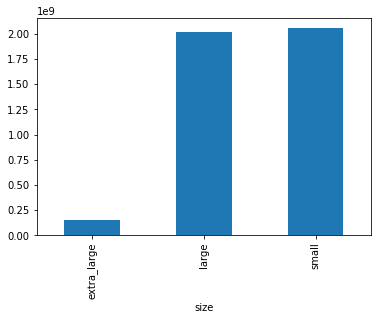

In [8]:
# Get the total number of avocados sold of each size
nb_sold_by_size = avocados.groupby("size")["nb_sold"].agg(sum)

# Create a bar plot of the number of avocados sold by size
nb_sold_by_size.plot(kind="bar")

# Show the plot
plt.show()

#**Changes in sales over time**
Line plots are designed to visualize the relationship between two numeric variables, where each data values is connected to the next one. They are especially useful for visualizing the change in a number over time since each time point is naturally connected to the next time point. In this exercise, you'll visualize the change in avocado sales over three years.

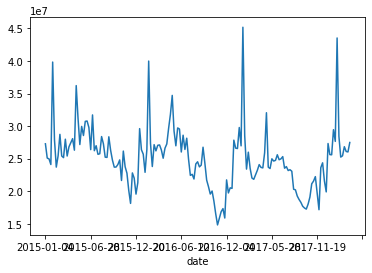

In [9]:
# Get the total number of avocados sold on each date
nb_sold_by_date = avocados.groupby("date")["nb_sold"].agg(sum)

# Create a line plot of the number of avocados sold by date
nb_sold_by_date.plot(x="date", y="nb_sold", kind="line")

# Show the plot
plt.show()

#**Avocado supply and demand**
Scatter plots are ideal for visualizing relationships between numerical variables. In this exercise, you'll compare the number of avocados sold to average price and see if they're at all related. If they're related, you may be able to use one number to predict the other.

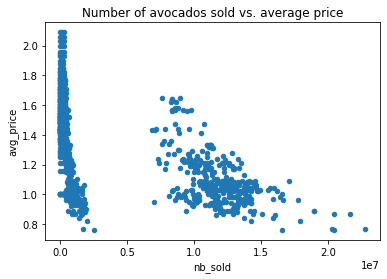

In [11]:
# Scatter plot of avg_price vs. nb_sold with title
avocados.plot(x="nb_sold", y="avg_price", kind="scatter", title="Number of avocados sold vs. average price")

# Show the plot
plt.show()

#**Price of conventional vs. organic avocados**
Creating multiple plots for different subsets of data allows you to compare groups. In this exercise, you'll create multiple histograms to compare the prices of conventional and organic avocados.

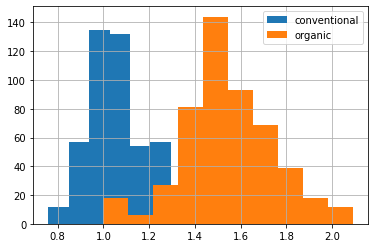

In [12]:
# Histogram of conventional avg_price 
avocados[avocados["type"]=="conventional"]["avg_price"].hist()

# Histogram of organic avg_price
avocados[avocados["type"]=="organic"]["avg_price"].hist()

# Add a legend
plt.legend(["conventional", "organic"])

# Show the plot
plt.show()

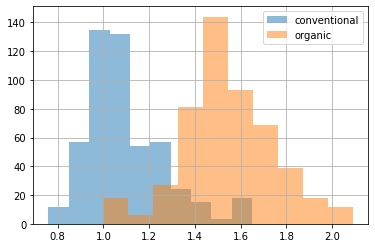

In [13]:
# Modify histogram transparency to 0.5 
avocados[avocados["type"] == "conventional"]["avg_price"].hist(alpha=0.5)

# Modify histogram transparency to 0.5
avocados[avocados["type"] == "organic"]["avg_price"].hist(alpha=0.5)

# Add a legend
plt.legend(["conventional", "organic"])

# Show the plot
plt.show()

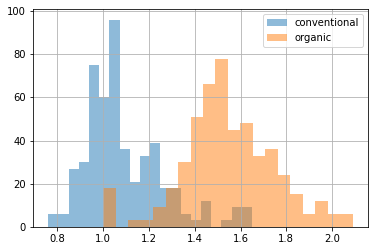

In [15]:
# Modify bins to 20
avocados[avocados["type"] == "conventional"]["avg_price"].hist(alpha=0.5, bins=20)

# Modify bins to 20
avocados[avocados["type"] == "organic"]["avg_price"].hist(alpha=0.5, bins=20)

# Add a legend
plt.legend(["conventional", "organic"])

# Show the plot
plt.show()

#**Finding missing values**
Missing values are everywhere, and you don't want them interfering with your work. Some functions ignore missing data by default, but that's not always the behavior you might want. Some functions can't handle missing values at all, so these values need to be taken care of before you can use them. If you don't know where your missing values are, or if they exist, you could make mistakes in your analysis. In this exercise, you'll determine if there are missing values in the dataset, and if so, how many.

In [34]:
avocados_2016 = avocados[avocados["year"] == 2016]
avocados_2016.head()

,date,type,year,avg_price,size,nb_sold
52,2016-12-25,conventional,2016,1.00,small,9255125.20
53,2016-12-18,conventional,2016,0.96,small,9394065.91
54,2016-12-11,conventional,2016,0.98,small,9009996.11
55,2016-12-04,conventional,2016,1.00,small,11043350.90
56,2016-11-27,conventional,2016,1.21,small,7891487.94


In [35]:
# Check individual values for missing values
avocados_2016.iloc[1,1]=NaN
print(avocados_2016.isna())

      date   type   year  avg_price   size  nb_sold
52   False  False  False      False  False    False
53   False   True  False      False  False    False
54   False  False  False      False  False    False
55   False  False  False      False  False    False
56   False  False  False      False  False    False
..     ...    ...    ...        ...    ...      ...
944  False  False  False      False  False    False
945  False  False  False      False  False    False
946  False  False  False      False  False    False
947  False  False  False      False  False    False
948  False  False  False      False  False    False

[312 rows x 6 columns]


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [36]:
# Check each column for missing values
print(avocados_2016.isna().any())

date         False
type          True
year         False
avg_price    False
size         False
nb_sold      False
dtype: bool


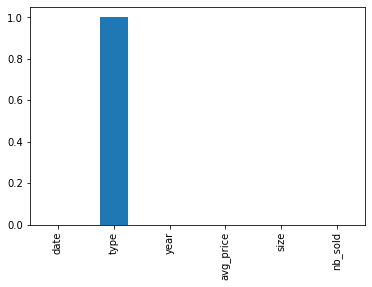

In [37]:
from numpy import NaN
# Bar plot of missing values by variable
avocados_2016.isna().sum().plot(kind="bar")

# Show plot
plt.show()

#**Removing missing values**
Now that you know there are some missing values in your DataFrame, you have a few options to deal with them. One way is to remove them from the dataset completely. In this exercise, you'll remove missing values by removing all rows that contain missing values.

In [38]:
# Remove rows with missing values
avocados_complete = avocados_2016.dropna()

# Check if any columns contain missing values
print(avocados_complete.isna().any())

date         False
type         False
year         False
avg_price    False
size         False
nb_sold      False
dtype: bool


#**Replacing missing values**
Another way of handling missing values is to replace them all with the same value. For numerical variables, one option is to replace values with 0— you'll do this here. However, when you replace missing values, you make assumptions about what a missing value means. In this case, you will assume that a missing number sold means that no sales for that avocado type were made that week.

In this exercise, you'll see how replacing missing values can affect the distribution of a variable using histograms. You can plot histograms for multiple variables at a time as follows:

`dogs[["height_cm", "weight_kg"]].hist()`

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


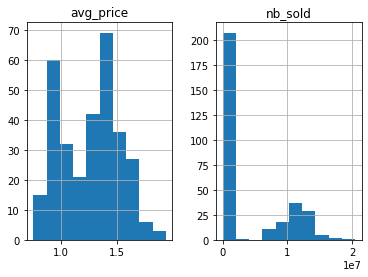

In [39]:
# List the columns with missing values
cols_with_missing = ["avg_price", "nb_sold"]
avocados_2016.iloc[0,[3,5]]=NaN

# Create histograms showing the distributions cols_with_missing
avocados_2016[cols_with_missing].hist()

# Show the plot
plt.show()

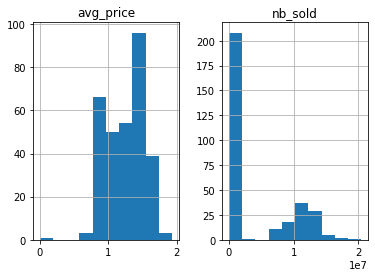

In [40]:
# Fill in missing values with 0
avocados_filled = avocados_2016.fillna(0)

# Create histograms of the filled columns
avocados_filled[cols_with_missing].hist()

# Show the plot
plt.show()

#**List of dictionaries**
You recently got some new avocado data from 2019 that you'd like to put in a DataFrame using the list of dictionaries method. Remember that with this method, you go through the data row by row.

In [41]:
# Create a list of dictionaries with new data
avocados_list = [
    {"date": "2019-11-03", "small_sold": 10376832, "large_sold": 7835071},
    {"date": "2019-11-10", "small_sold": 10717154, "large_sold": 8561348},
]

# Convert list into DataFrame
avocados_2019 = pd.DataFrame(avocados_list)

# Print the new DataFrame
avocados_2019

,date,small_sold,large_sold
0,2019-11-03,10376832,7835071
1,2019-11-10,10717154,8561348


#**Dictionary of lists**
Some more data just came in! This time, you'll use the dictionary of lists method, parsing the data column by column.

In [42]:
# Create a dictionary of lists with new data
avocados_dict = {
  "date": ["2019-11-17", "2019-12-01"],
  "small_sold": [10859987, 9291631],
  "large_sold": [7674135, 6238096]
}

# Convert dictionary into DataFrame
avocados_2019 = pd.DataFrame(avocados_dict)

# Print the new DataFrame
avocados_2019

,date,small_sold,large_sold
0,2019-11-17,10859987,7674135
1,2019-12-01,9291631,6238096


#**CSV to DataFrame**
You work for an airline, and your manager has asked you to do a competitive analysis and see how often passengers flying on other airlines are involuntarily bumped from their flights. You got a CSV file (airline_bumping.csv) from the Department of Transportation containing data on passengers that were involuntarily denied boarding in 2016 and 2017, but it doesn't have the exact numbers you want. In order to figure this out, you'll need to get the CSV into a pandas DataFrame and do some manipulation!

In [ ]:
airline_bumping = pd.read_csv("airline_bumping.csv")
print(airline_bumping.head())

airline_totals = airline_bumping.groupby("airline")[["nb_bumped", "total_passengers"]].sum()

airline_totals["bumps_per_10k"] = airline_totals["nb_bumped"] / airline_totals["total_passengers"] * 10000

# Print airline_totals
print(airline_totals)

#**DataFrame to CSV**
You're almost there! To make things easier to read, you'll need to sort the data and export it to CSV so that your colleagues can read it.

In [ ]:
# Create airline_totals_sorted
airline_totals_sorted = airline_totals.sort_values("bumps_per_10k", ascending=False)

# Print airline_totals_sorted
print(airline_totals_sorted)

# Save as airline_totals_sorted.csv
airline_totals_sorted.to_csv("airline_totals_sorted.csv")